<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Wigner_Function_Propagation_Animations_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating animation... this may take a moment.


Animation displayed inline.
Saved animation to 'wigner_pendulum.mp4' at 200 DPI.


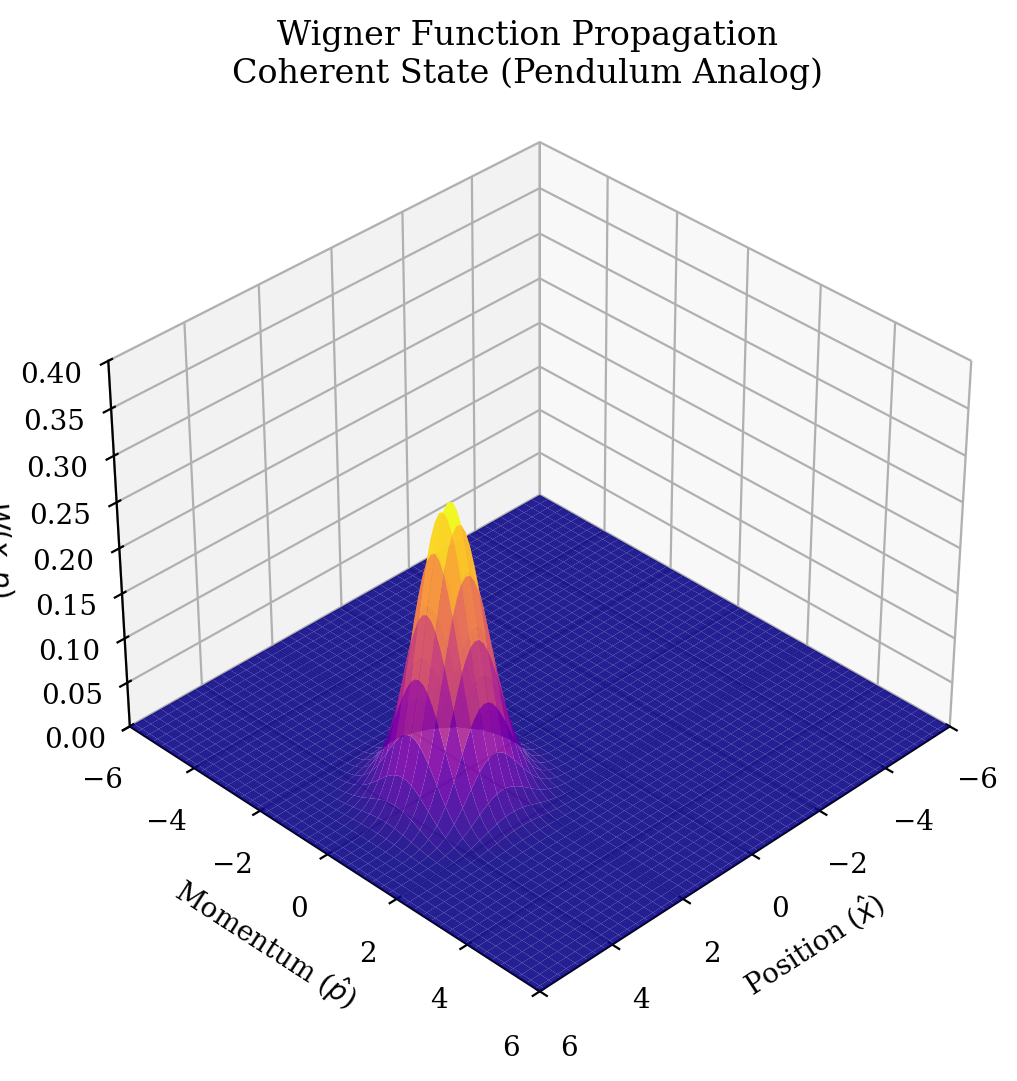

In [ ]:
"""
Wigner Function Propagation Animation for a Pendulum (Harmonic Oscillator).

This script visualizes the time evolution of the Wigner quasi-probability
distribution for a quantum harmonic oscillator, which serves as a quantum
mechanical analog to a classical pendulum in the small-angle approximation.

The state simulated is a Coherent State, which exhibits classical-like
oscillatory behavior in phase space (rotating Gaussian).

Standards:
    - PEP 8: Style Guide for Python Code.
    - PEP 257: Docstring Conventions.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# -----------------------------------------------------------------------------
# Configuration and Constants
# -----------------------------------------------------------------------------

# Set plotting parameters for high-resolution output
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12


def calculate_wigner_coherent(x_grid, p_grid, alpha, time, omega=1.0):
    """
    Calculate the analytical Wigner function for a coherent state.

    A coherent state |alpha> remains a coherent state under time evolution
    in a harmonic potential, merely acquiring a phase factor. The Wigner
    function is a Gaussian that rotates rigidly in phase space.

    Args:
        x_grid (np.ndarray): Meshgrid array for position X.
        p_grid (np.ndarray): Meshgrid array for momentum P.
        alpha (complex): Initial coherent state amplitude.
        time (float): Current time step.
        omega (float): Angular frequency of the oscillator.

    Returns:
        np.ndarray: The calculated Wigner function values (Z-axis).
    """
    # Evolve alpha in time: alpha(t) = alpha(0) * exp(-i * omega * t)
    alpha_t = alpha * np.exp(-1j * omega * time)

    # Extract expectation values for position (x0) and momentum (p0)
    # In dimensionless units (hbar=1, m=1, w=1):
    # x0 = sqrt(2) * Re(alpha)
    # p0 = sqrt(2) * Im(alpha)
    x0 = np.sqrt(2) * np.real(alpha_t)
    p0 = np.sqrt(2) * np.imag(alpha_t)

    # Calculate the Gaussian Wigner function
    # W(x, p) = (1/pi) * exp( - (x - x0)^2 - (p - p0)^2 )
    w_values = (1 / np.pi) * np.exp(-(x_grid - x0)**2 - (p_grid - p0)**2)

    return w_values


def main():
    """
    Execute the animation generation process.

    Sets up the grid, figure, and animation loop, then saves the result.
    """
    # -------------------------------------------------------------------------
    # Simulation Setup
    # -------------------------------------------------------------------------

    # Grid parameters
    grid_size = 6.0
    resolution = 100  # Higher resolution for smoother surface
    x = np.linspace(-grid_size, grid_size, resolution)
    p = np.linspace(-grid_size, grid_size, resolution)
    x_grid, p_grid = np.meshgrid(x, p)

    # Physics parameters
    omega = 1.0           # Frequency
    alpha_0 = 2.0 + 0j    # Initial displacement (amplitude of pendulum)
    total_time = 2 * np.pi
    frames = 60

    # -------------------------------------------------------------------------
    # Visualization Setup
    # -------------------------------------------------------------------------

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Initial data calculation
    z_data = calculate_wigner_coherent(x_grid, p_grid, alpha_0, 0, omega)

    # Initial Plot
    surface = [ax.plot_surface(
        x_grid, p_grid, z_data,
        cmap='plasma',
        edgecolor='none',
        alpha=0.9,
        antialiased=True
    )]

    # Axis styling
    ax.set_xlim(-grid_size, grid_size)
    ax.set_ylim(-grid_size, grid_size)
    ax.set_zlim(0, 0.4)
    ax.set_xlabel(r'Position ($\hat{x}$)')
    ax.set_ylabel(r'Momentum ($\hat{p}$)')
    ax.set_zlabel(r'$W(x, p)$')
    ax.set_title(f'Wigner Function Propagation\nCoherent State (Pendulum Analog)')

    # Tweaking the view angle for better 3D perception
    ax.view_init(elev=35, azim=45)

    def update(frame):
        """
        Update function for the animation loop.

        Args:
            frame (int): The current frame index.

        Returns:
            tuple: The modified artist objects (surface,).
        """
        # Calculate current time
        t = (frame / frames) * total_time

        # Clear the old surface (matplotlib 3D quirk: cannot just update data)
        surface[0].remove()

        # Calculate new Wigner function
        new_z = calculate_wigner_coherent(x_grid, p_grid, alpha_0, t, omega)

        # Plot new surface
        surface[0] = ax.plot_surface(
            x_grid, p_grid, new_z,
            cmap='plasma',
            edgecolor='none',
            alpha=0.9,
            antialiased=True
        )

        return surface[0],

    # -------------------------------------------------------------------------
    # Animation Rendering
    # -------------------------------------------------------------------------

    print("Generating animation... this may take a moment.")

    anim = animation.FuncAnimation(
        fig,
        update,
        frames=frames,
        interval=50,  # Time between frames in ms
        blit=False    # Blit must be False for 3D plots usually
    )

    # In a Colab environment, you usually want to display HTML5 video
    # or save as a specific file format.

    # Option 1: Render to HTML5 Video (Best for Colab inline viewing)
    try:
        html_video = anim.to_html5_video()
        display(HTML(html_video))
        print("Animation displayed inline.")
    except Exception as e:
        print(f"Could not render inline HTML video (missing ffmpeg?): {e}")

    # Option 2: Save as MP4 (Best for downloading)
    try:
        anim.save('wigner_pendulum.mp4', writer='ffmpeg', fps=30, dpi=200)
        print("Saved animation to 'wigner_pendulum.mp4' at 200 DPI.")
    except Exception as e:
        print(f"Could not save file: {e}")

if __name__ == "__main__":
    main()

Saved MP4 to: wigner_double_well.mp4


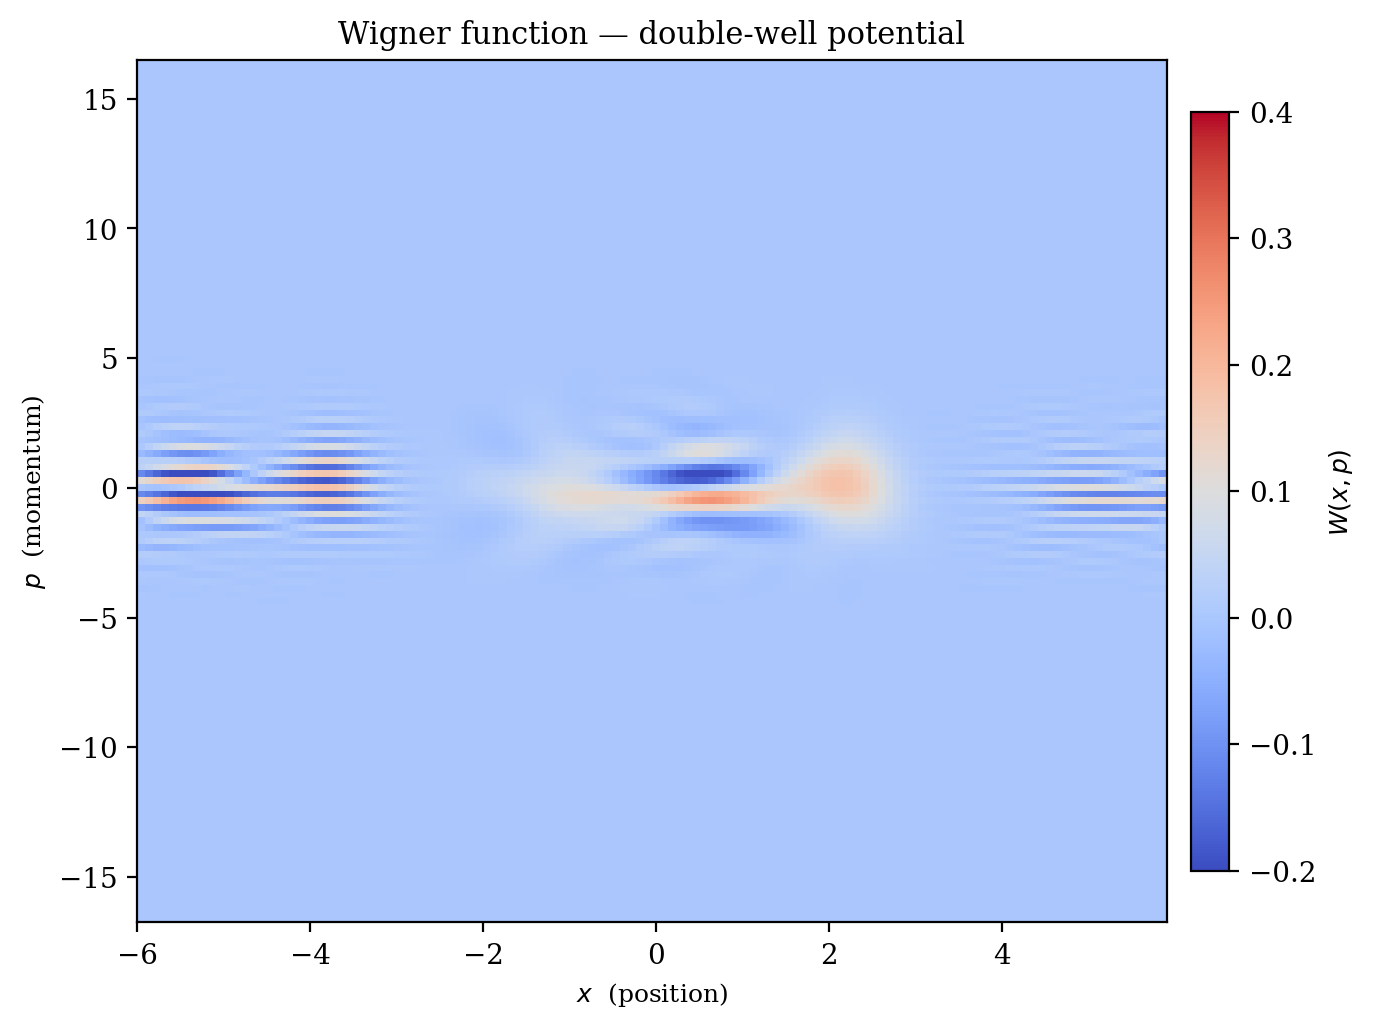

In [4]:
"""
Wigner function propagation in a one-dimensional double-well potential.

This module simulates the time evolution of a quantum wave packet by solving
the time-dependent Schrödinger equation (TDSE) with a split-operator spectral
method, then computes and animates the Wigner quasi-probability distribution
per frame.

Highlights:
    * Vectorized Wigner transform: W(x, p) ∝ ∫ dy e^{-2 i p y} ψ*(x - y) ψ(x + y)
      computed via an FFT over the relative coordinate y, for all x at once.
    * Modern FFT backend (scipy.fft) with norm="ortho" for unitary time-stepping.
    * Clean 2-D imshow animation by default (with consistent color limits),
      plus an optional 3-D surface mode.

References:
    • Split-operator spectral method: Feit, Fleck, Steiger (1982). :contentReference[oaicite:0]{index=0}
    • Wigner function basics and properties: O’Connell (2010); Wikipedia summary. :contentReference[oaicite:1]{index=1}
    • Use scipy.fft (fftpack is legacy): SciPy FFT documentation. :contentReference[oaicite:2]{index=2}
    • Matplotlib animation best practices: FuncAnimation docs. :contentReference[oaicite:3]{index=3}

Style:
    • PEP 8 and PEP 257 compliant docstrings and names.

Run:
    Save as a .py or paste into a notebook. For notebooks, ensure that ffmpeg
    or pillow is available for saving animations (MP4/GIF).
"""

from __future__ import annotations

from dataclasses import dataclass
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.fft import fft, ifft, fftshift, fftfreq
from IPython.display import HTML, display  # Safe in scripts and notebooks


# ----------------------------------------------------------------------------- #
# Matplotlib high-DPI and serif font for print-quality frames
# ----------------------------------------------------------------------------- #
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.labelsize"] = 9
plt.rcParams["axes.titlesize"] = 11


# ----------------------------------------------------------------------------- #
# User controls (“control knobs”)
# ----------------------------------------------------------------------------- #
@dataclass
class Knobs:
    """Container for top-level simulation and rendering parameters."""

    # Grid and time
    n: int = 128              # number of spatial points (power of 2 recommended)
    L: float = 12.0           # domain length (x ∈ [-L/2, L/2))
    dt: float = 0.1           # time step (dimensionless units; ħ = m = 1)

    # Potential (double well: V = H * ((x/x0)^2 - 1)^2, minima at ±x0)
    barrier_height: float = 3.0
    separation: float = 4.0   # well-to-well separation ≈ 2 x0

    # Initial Gaussian wavepacket ψ(x, 0)
    x0: float = 2.0           # initial center
    p0: float = -1.0          # initial momentum
    sigma: float = 0.5        # position width

    # Animation
    frames: int = 60
    steps_per_frame: int = 4  # physics steps per animation frame for smoothness
    use_3d: bool = False      # default to 2-D imshow for clean visuals

    # Color range (keep fixed across frames for a stable palette)
    vmin: float = -0.2
    vmax: float = 0.4

    # Saving
    fps: int = 20
    outfile_mp4: str = "wigner_double_well.mp4"
    outfile_gif: str = "wigner_double_well.gif"


# ----------------------------------------------------------------------------- #
# Quantum system and numerics
# ----------------------------------------------------------------------------- #
class QuantumSystem:
    """
    One-dimensional split-operator TDSE integrator with a Wigner transform.

    Attributes:
        n: Number of spatial grid points.
        L: Physical domain size (x ∈ [-L/2, L/2)).
        dt: Time step.
        dx: Spatial grid spacing.
        x: Position grid (1-D array, length n).
        k: Angular spatial frequency grid (1-D array); momentum p = k (ħ = 1).
        psi: Wavefunction samples on x grid (complex128).
        V: Potential samples V(x) (real64).
        U_V: Precomputed half-step potential operator exp(-i V Δt / 2).
        U_T: Precomputed kinetic operator in k-space exp(-i k^2 Δt / 2).
    """

    def __init__(self, n: int, L: float, dt: float) -> None:
        self.n = int(n)
        self.L = float(L)
        self.dt = float(dt)

        # Spatial grid: use endpoint=False for FFT periodicity consistency.
        self.dx = self.L / self.n
        self.x = np.linspace(-self.L / 2.0, self.L / 2.0, self.n, endpoint=False)

        # k-grid (angular frequency), momentum p = k for ħ = m = 1
        self.k = 2.0 * np.pi * fftfreq(self.n, d=self.dx)

        # Operators (filled after setting V)
        self.psi = np.zeros(self.n, dtype=np.complex128)
        self.V = np.zeros(self.n, dtype=np.float64)
        self.U_V = np.ones(self.n, dtype=np.complex128)
        self.U_T = np.exp(-1j * (self.k**2) * self.dt / 2.0)  # exp[-i p^2 dt / (2m)], m = 1

    # --------------------------- Initialization --------------------------- #
    def set_double_well(self, barrier_height: float, separation: float) -> None:
        """
        Define V(x) = H * ((x/x0)^2 - 1)^2 with barrier ~ H at x = 0 and minima at ±x0.

        Args:
            barrier_height: Peak value at x = 0.
            separation: Approximate distance between minima (2 * x0).
        """
        x0 = separation / 2.0
        V = barrier_height * ((self.x / x0) ** 2 - 1.0) ** 2
        self.V = V.astype(np.float64, copy=False)
        self.U_V = np.exp(-1j * self.V * self.dt / 2.0)

    def set_initial_gaussian(self, x0: float, p0: float, sigma: float) -> None:
        """
        Initialize ψ(x, 0) as a normalized Gaussian wave packet.

        Args:
            x0: Initial position.
            p0: Initial momentum.
            sigma: Standard deviation in position.
        """
        norm = (1.0 / (2.0 * np.pi * sigma**2)) ** 0.25
        phase = np.exp(1j * p0 * self.x)
        envelope = np.exp(-((self.x - x0) ** 2) / (4.0 * sigma**2))
        self.psi = (norm * envelope * phase).astype(np.complex128, copy=False)

    # ------------------------------ Evolution ---------------------------- #
    def step(self) -> None:
        """
        Advance ψ(x) by one time step using Strang splitting:
            ψ ← e^{-i V Δt/2}  FFT^{-1}[ e^{-i k^2 Δt/2} FFT( e^{-i V Δt/2} ψ ) ].
        FFTs use norm="ortho" for unitary propagation.
        """
        self.psi *= self.U_V
        self.psi = ifft(fft(self.psi, norm="ortho") * self.U_T, norm="ortho")
        self.psi *= self.U_V

    # --------------------------- Wigner transform ------------------------ #
    def wigner(self) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        """
        Compute W(x, p) via an FFT over the relative coordinate y.

        Discrete form (ħ = 1):
            W(x_i, p_k) ≈ (1/π) * FFT_y[ ψ(x_i + y) ψ*(x_i - y) ](2p)
        implemented for all x_i simultaneously by broadcasting indices.

        Returns:
            X: 2-D x-grid (shape n×n) for plotting.
            P: 2-D p-grid (shape n×n) for plotting.
            W: 2-D array (shape n×n) of real Wigner values.
        """
        n = self.n
        # Relative-coordinate indices y ∈ { -n/2, ..., n/2 - 1 }
        y_idx = np.arange(-n // 2, n // 2)

        # x indices as a column vector for broadcasting
        i_idx = np.arange(n)[:, None]

        # Periodic index maps for x ± y
        plus = (i_idx + y_idx) % n
        minus = (i_idx - y_idx) % n

        psi_plus = self.psi[plus]
        psi_minus = np.conjugate(self.psi[minus])

        # Autocorrelation g(x, y) = ψ(x + y) ψ*(x - y)
        g_xy = psi_plus * psi_minus

        # FFT over y with proper centering, unitary norm
        G = fftshift(fft(fftshift(g_xy, axes=1), axis=1, norm="ortho"), axes=1)

        # Real Wigner values with conventional (1/π) prefactor
        W = np.real(G) / np.pi

        # Build phase-space grids
        # For kernel e^{-2 i p y}, p-grid pairs with DFT frequency ν via p = π ν
        nu = fftfreq(n, d=self.dx)           # 1/length
        p = np.pi * fftshift(nu)             # momentum grid (centered)
        X, P = np.meshgrid(self.x, p)

        # W currently has shape (n_x, n_p) aligned with (row=x, col=shifted y→p)
        return X, P, W.T


# ----------------------------------------------------------------------------- #
# Animation builders
# ----------------------------------------------------------------------------- #
def build_animation(knobs: Knobs) -> animation.FuncAnimation:
    """
    Create a Matplotlib animation of the Wigner function over time.

    Args:
        knobs: Configuration parameters.

    Returns:
        A Matplotlib FuncAnimation object.
    """
    sys = QuantumSystem(n=knobs.n, L=knobs.L, dt=knobs.dt)
    sys.set_double_well(knobs.barrier_height, knobs.separation)
    sys.set_initial_gaussian(knobs.x0, knobs.p0, knobs.sigma)

    fig = plt.figure(figsize=(8.0, 5.6))
    if knobs.use_3d:
        ax = fig.add_subplot(111, projection="3d")
    else:
        ax = fig.add_subplot(111)

    # Initial Wigner
    X, P, W = sys.wigner()

    # Fix consistent color limits across frames to avoid flicker
    vmin, vmax = knobs.vmin, knobs.vmax

    if knobs.use_3d:
        surf = [ax.plot_surface(
            X, P, W,
            cmap="coolwarm",
            vmin=vmin, vmax=vmax,
            rstride=2, cstride=2,
            linewidth=0.1,
            antialiased=True,
            alpha=0.95,
        )]
        ax.set_zlim(vmin, vmax)
        ax.set_zlabel(r"$W(x,p)$")
        ax.view_init(elev=40, azim=-60)

        def _update(_frame: int):
            for _ in range(knobs.steps_per_frame):
                sys.step()
            _, _, Wn = sys.wigner()
            surf[0].remove()
            surf[0] = ax.plot_surface(
                X, P, Wn,
                cmap="coolwarm",
                vmin=vmin, vmax=vmax,
                rstride=2, cstride=2,
                linewidth=0.1,
                antialiased=False,
                alpha=0.95,
            )
            return surf[0],

        init_artist = tuple(surf)
        artists = None  # blitting not supported on 3D

    else:
        extent = (X.min(), X.max(), P.min(), P.max())
        im = ax.imshow(
            W,
            origin="lower",
            extent=extent,
            cmap="coolwarm",
            vmin=vmin,
            vmax=vmax,
            interpolation="none",
            animated=True,
            aspect="auto",
        )
        cbar = fig.colorbar(im, ax=ax, shrink=0.88, pad=0.02)
        cbar.set_label(r"$W(x,p)$")

        def _update(_frame: int):
            for _ in range(knobs.steps_per_frame):
                sys.step()
            _, _, Wn = sys.wigner()
            im.set_data(Wn)
            return (im,)

        def _init():
            im.set_data(W)
            return (im,)

        init_artist = _init
        artists = True  # blit=True works for 2-D artists

    ax.set_xlabel(r"$x$  (position)")
    ax.set_ylabel(r"$p$  (momentum)")
    ax.set_title("Wigner function — double-well potential")

    anim = animation.FuncAnimation(
        fig,
        _update,
        init_func=init_artist,
        frames=knobs.frames,
        interval=50,
        blit=artists,
        cache_frame_data=True,
    )
    return anim


def save_animation(anim: animation.FuncAnimation, knobs: Knobs) -> None:
    """
    Save the animation as MP4 (ffmpeg) with a Pillow GIF fallback.

    Args:
        anim: The animation to save.
        knobs: Configuration parameters with filenames and fps.
    """
    try:
        anim.save(knobs.outfile_mp4, writer="ffmpeg", fps=knobs.fps, dpi=200)
        print(f"Saved MP4 to: {knobs.outfile_mp4}")
    except Exception as exc:
        print(f"MP4 save failed ({exc}). Falling back to GIF (PillowWriter).")
        try:
            anim.save(knobs.outfile_gif, writer="pillow", fps=knobs.fps)
            print(f"Saved GIF to: {knobs.outfile_gif}")
        except Exception as exc2:
            print(f"GIF save failed: {exc2}")


def main() -> None:
    """Build, preview inline (if in a notebook), and save the animation."""
    knobs = Knobs()
    anim = build_animation(knobs)

    # Inline preview (works in notebooks; harmless in scripts)
    try:
        display(HTML(anim.to_html5_video()))
    except Exception as exc:
        print(f"Inline HTML5 animation preview failed: {exc}")

    # Persist to disk
    save_animation(anim, knobs)


if __name__ == "__main__":
    main()

Total simulated time T_total ≈ 288.000 (units with ℏ = m = 1).


Saved MP4 to: wigner_double_well_long_2d.mp4


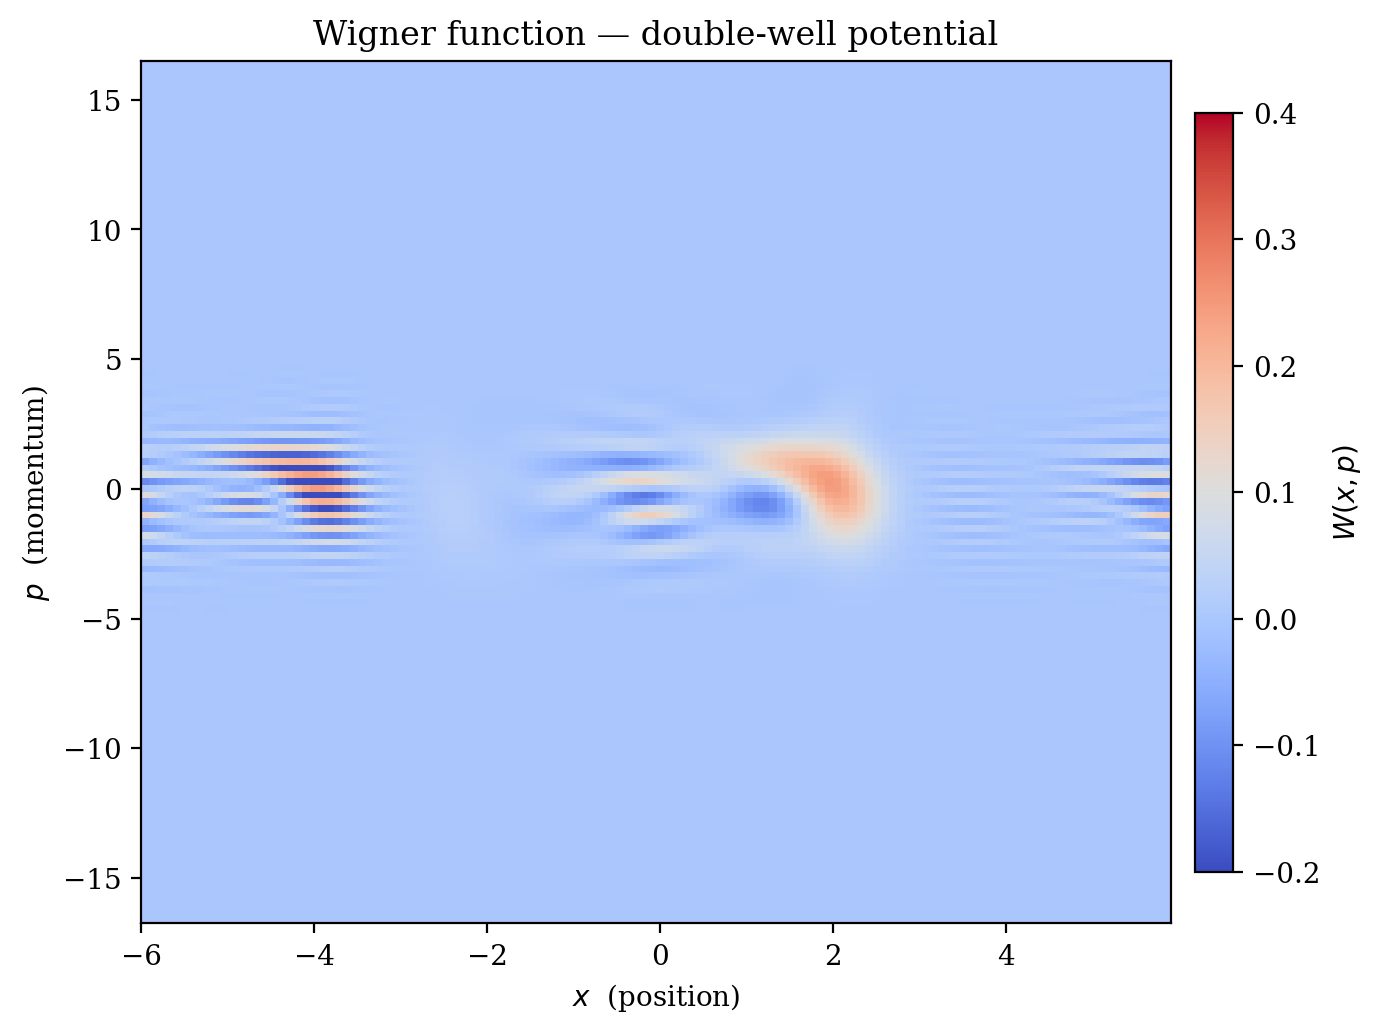

In [11]:
# %% Wigner — long-run 2-D animation so the packet reaches the edges (PEP 8/257)
"""
Extend total simulated time T_total = frames * steps_per_frame * dt so the wave
packet can explore the entire plotting window. This reuses your Knobs,
QuantumSystem, build_animation, and save_animation definitions, but forces 2-D.
"""

from __future__ import annotations

from IPython.display import HTML, display

# --- Longer run: more frames and more physics steps per frame (2-D only) ---
knobs_2d_long = Knobs(
    n=128,             # keep grid the same (powers of two are FFT-friendly)
    L=12.0,
    dt=0.1,
    barrier_height=3.0,
    separation=4.0,
    x0=2.0,
    p0=-1.0,           # initial "kick" (see optional tweak below)
    sigma=0.5,
    frames=240,        # ↑ from 60
    steps_per_frame=12,# ↑ from 4
    use_3d=False,      # force 2-D imshow path
    vmin=-0.2,
    vmax=0.4,
    fps=20,
    outfile_mp4="wigner_double_well_long_2d.mp4",
    outfile_gif="wigner_double_well_long_2d.gif",
)

# Optional physics tweaks to reach the edges even sooner:
# knobs_2d_long.p0 = -2.0         # stronger leftward momentum "kick"
# knobs_2d_long.barrier_height = 2.5  # slightly lower barrier
# knobs_2d_long.dt = 0.08         # modest dt change (Strang split remains stable)

# Report total covered simulation time
t_total = knobs_2d_long.frames * knobs_2d_long.steps_per_frame * knobs_2d_long.dt
print(f"Total simulated time T_total ≈ {t_total:.3f} (units with ℏ = m = 1).")

# Build → preview inline → save
anim2d = build_animation(knobs_2d_long)

try:
    display(HTML(anim2d.to_html5_video()))  # requires FFmpeg
except Exception as exc:
    print(f"HTML5 video failed ({exc}); trying JSHTML fallback...")
    display(HTML(anim2d.to_jshtml()))

save_animation(anim2d, knobs_2d_long)  # MP4 preferred; GIF fallback handled inside


Saved MP4 to: wigner_double_well.mp4


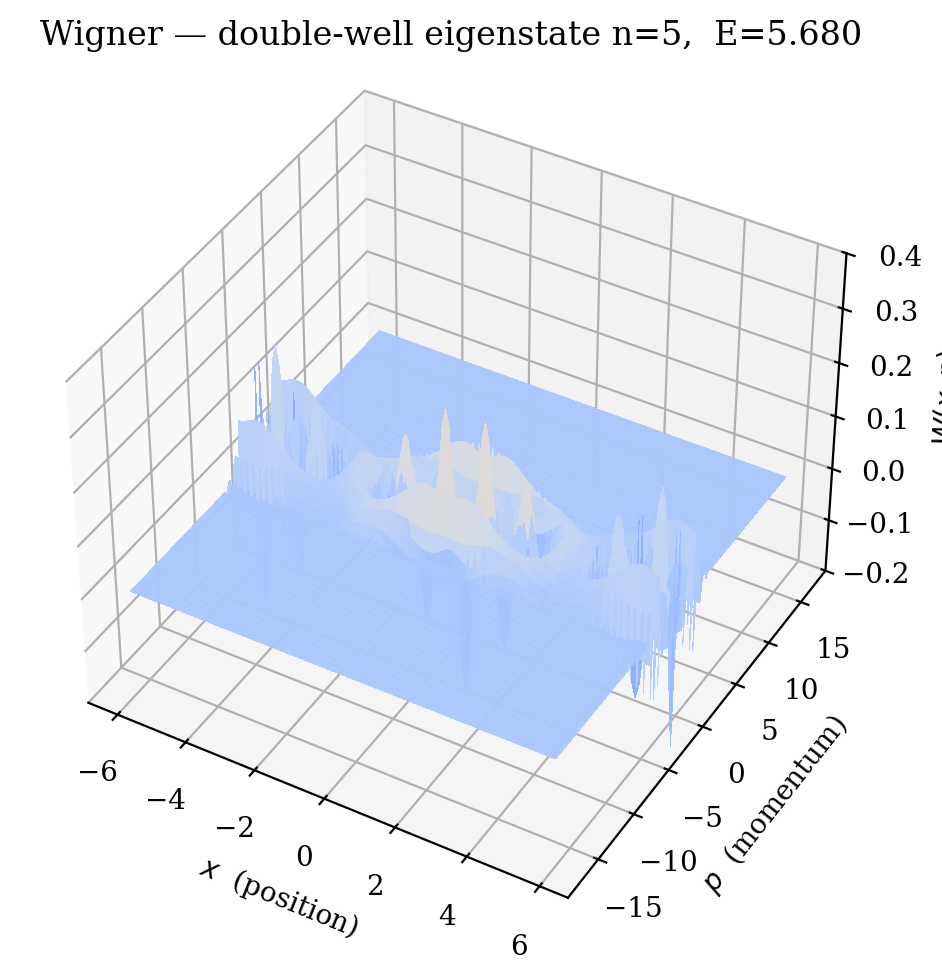

In [9]:
# %% 3-D Wigner — eigenstate (n) sweep for the double-well (PEP 8/257 compliant)
"""
Animate the Wigner function for stationary eigenstates |n⟩ of the same
double-well potential used above. We construct the time-independent
Hamiltonian on the x-grid (Dirichlet finite-difference Laplacian + V(x)),
solve for the lowest few eigenpairs, and for each requested n we set
ψ(x) ← φ_n(x) and render W(x, p).

Notes:
    • Uses the same grid, units (ħ = m = 1), and V(x) as your prior cell.
    • Finite-difference second derivative with Dirichlet boundaries.
    • 3-D redraw per frame (blit=False) is kept for mplot3d stability.
"""

from __future__ import annotations

from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display


def _compute_eigenstates(system: QuantumSystem, n_eigs: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compute the lowest n_eigs eigenpairs of H = -½ d²/dx² + V(x) on the system grid.

    Args:
        system: Initialized QuantumSystem with V(x) defined.
        n_eigs: Number of lowest eigenpairs to return.

    Returns:
        (energies, eigenvecs): energies shape (n_eigs,), eigenvecs shape (N, n_eigs)
                               eigenvecs are L2-normalized under ∫|ψ|² dx = 1.
    """
    N = system.n
    dx = system.dx

    # Dirichlet finite-difference Laplacian (no wrap-around terms).
    main = -2.0 * np.ones(N, dtype=float)
    off = 1.0 * np.ones(N - 1, dtype=float)
    D2 = (np.diag(main) + np.diag(off, 1) + np.diag(off, -1)) / (dx ** 2)

    T = -0.5 * D2                      # kinetic
    H = T + np.diag(system.V)          # add potential

    # Dense symmetric solve; N≈128 is fine. Sort ascending by energy.
    evals, evecs = np.linalg.eigh(H)
    evals = evals[:n_eigs]
    evecs = evecs[:, :n_eigs]

    # Normalize eigenvectors for the continuum inner product ∫|ψ|² dx = 1.
    norms = np.sqrt(np.sum(np.abs(evecs) ** 2, axis=0) * dx)
    evecs = evecs / norms
    return evals, evecs


def build_animation_3d_n_sweep(knobs: Knobs,
                               n_list: List[int],
                               n_eigs: int | None = None) -> animation.FuncAnimation:
    """
    Build a 3-D surface animation that steps through requested eigen-indices n_list.

    Args:
        knobs: Simulation/plot controls (grid, potential, color range, etc.).
        n_list: Which eigen-indices to display (e.g., [0, 1, 2, 3, 4]).
        n_eigs: (Optional) how many eigenpairs to compute; defaults to max(n_list)+1.

    Returns:
        Matplotlib FuncAnimation object.
    """
    sys = QuantumSystem(n=knobs.n, L=knobs.L, dt=knobs.dt)
    sys.set_double_well(knobs.barrier_height, knobs.separation)

    need = (max(n_list) + 1) if n_eigs is None else max(n_eigs, max(n_list) + 1)
    energies, states = _compute_eigenstates(sys, need)

    # Figure and initial Wigner for n0
    fig = plt.figure(figsize=(8.0, 5.6))
    ax = fig.add_subplot(111, projection="3d")

    n0 = int(n_list[0])
    sys.psi = states[:, n0]
    X, P, W = sys.wigner()

    surf = [ax.plot_surface(
        X, P, W,
        cmap="coolwarm",
        vmin=knobs.vmin, vmax=knobs.vmax,
        rstride=2, cstride=2,
        linewidth=0.1,
        antialiased=False,
        alpha=0.95,
    )]

    ax.set_xlabel(r"$x$  (position)")
    ax.set_ylabel(r"$p$  (momentum)")
    ax.set_zlabel(r"$W(x,p)$")
    ax.set_zlim(knobs.vmin, knobs.vmax)
    ax.set_title(f"Wigner — double-well eigenstate n={n0},  E={energies[n0]:.3f}")
    ax.view_init(elev=40, azim=-60)

    def _init():
        return tuple(surf)

    def _update(frame: int):
        n = int(n_list[frame % len(n_list)])
        sys.psi = states[:, n]
        _, _, Wn = sys.wigner()
        surf[0].remove()
        surf[0] = ax.plot_surface(
            X, P, Wn,
            cmap="coolwarm",
            vmin=knobs.vmin, vmax=knobs.vmax,
            rstride=2, cstride=2,
            linewidth=0.1,
            antialiased=False,
            alpha=0.95,
        )
        ax.set_title(f"Wigner — double-well eigenstate n={n},  E={energies[n]:.3f}")
        return (surf[0],)

    anim = animation.FuncAnimation(
        fig,
        _update,
        init_func=_init,
        frames=len(n_list),
        interval=50,
        blit=False,
        cache_frame_data=False,
    )
    return anim


# ---- Choose which n to show, then render/save ----
N_LIST = [0, 1, 2, 3, 4, 5]  # edit to taste

knobs_n = Knobs(
    use_3d=True,
    frames=len(N_LIST),  # not used directly, but good metadata
    steps_per_frame=1,   # not used here
    vmin=-0.2,
    vmax=0.4,
)

anim3d_n = build_animation_3d_n_sweep(knobs_n, n_list=N_LIST)

try:
    display(HTML(anim3d_n.to_html5_video()))
except Exception as exc:
    print(f"HTML5 video failed ({exc}); trying JS fallback...")
    display(HTML(anim3d_n.to_jshtml()))

save_animation(anim3d_n, knobs_n)  # reuses your helper to save MP4/GIF